# Udacity data wrangling


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#aav">Analysis and Viszualization</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Course Outline
Data wrangling is a core skill that everyone who works with data should be familiar with since so much of the world's data isn't clean. Though this course is geared towards those who use Python to analyze data, the high-level concepts can be applied in all programming languages and software applications for data analysis.

### Lesson 1: The Walkthrough
In the first lesson of this course, we'll walk through an example of data wrangling so you get a feel for the full process. We'll introduce gathering data, then download a file from the web and import it into a Jupyter Notebook. We'll then introduce assessing data and assess the dataset we just downloaded both visually and programmatically. We'll be looking for quality and structural issues. Finally, we'll introduce cleaning data and use code to clean a few of the issues we identified while assessing.

The goal of this walkthrough is awareness rather than mastery, so you'll be able to start wrangling your own data even after just this first lesson.

### Lessons 2-4: Gathering, Assessing, and Cleaning Data (in Detail)
In the following lessons, you'll master gathering, assessing, and cleaning data. We'll cover the full data wrangling process with real datasets too, so think of this course as a series of wrangling journeys. You'll learn by doing and leave each lesson with tangible skills.

### Dataset: Armenian Online Job Postings 
The online job market is a good indicator of overall demand for labor in an economy. This dataset consists of 19,000 job postings from 2004 to 2015 posted on CareerCenter, an Armenian human resource portal. Since postings are text documents and tend to have similar structures, text mining can be used to extract features like posting date, job title, company name, job description, salary, and more. Postings that had no structure or were not job-related were removed. The data was originally scraped from a Yahoo! mailing group.

Inspiration
Students, job seekers, employers, career advisors, policymakers, and curriculum developers use online job postings to explore the nature of today's dynamic labor market. This dataset can be used to:

Understand the demand for certain professions, job titles, or industries
Identify skills that are most frequently required by employers, and how the distribution of necessary skills changes over time
Help education providers with curriculum development
Acknowledgements
The data collection and initial research were funded by the American University of Armenia’s research grant (2015).

Habet Madoyan, CEO at Datamotus, compiled this dataset and has granted us permission to republish. The republished dataset is identical to the original dataset, which can be found here. Datamotus also published a report detailing the text mining techniques used, plus analyses and visualizations of the data.
The dataset can be downloaded from kaggle https://www.kaggle.com/udacity/armenian-online-job-postings/metadata

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import zipfile


<a id='wrangling'></a>
## Data Wrangling

### General Properties
First of all I'm going to read the three datasets and try to get a first impression by having a look to the data

## Gather Data
Extract zip file and read csv.


In [18]:
# Extract all contents from zip file
with zipfile.ZipFile('../ArmenianJobPortal/armenian-online-job-postings.zip','r') as myzip:
    myzip.extractall('../ArmenianJobPortal/')

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
# read all datasets
df_jobs = pd.read_csv('../ArmenianJobPortal/online-job-postings.csv')
df_jobs.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


## Assessing data
Target is to get an idea of data quality, so having a look to the data and get a feeling of needed changes to be able to work with the data.

In [5]:
df_jobs

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18996,Technolinguistics NGO\r\n\r\n\r\nTITLE: Senio...,"Dec 28, 2015",Senior Creative UX/ UI Designer,Technolinguistics NGO,NaN,Full-time,NaN,NaN,NaN,Long-term,...,Competitive,"To apply for this position, please send your\r...",29 December 2015,28 January 2016,NaN,As a company Technolinguistics has a mandate t...,NaN,2015,12,False
18997,"""Coca-Cola Hellenic Bottling Company Armenia"" ...","Dec 30, 2015",Category Development Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN,Full-time,All interested professionals.,NaN,ASAP,Long-term with a probation period of 3 months.,...,NaN,All interested candidates are kindly requested...,30 December 2015,20 January 2016,NaN,NaN,NaN,2015,12,False
18998,"""Coca-Cola Hellenic Bottling Company Armenia"" ...","Dec 30, 2015",Operational Marketing Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN,Full-time,All interested professionals.,NaN,ASAP,Long-term with a probation period of 3 months.,...,NaN,All interested candidates are kindly requested...,30 December 2015,20 January 2016,NaN,NaN,NaN,2015,12,False
18999,San Lazzaro LLC\r\n\r\n\r\nTITLE: Head of O...,"Dec 30, 2015",Head of Online Sales Department,San Lazzaro LLC,NaN,NaN,NaN,NaN,NaN,Long-term,...,Highly competitive,Interested candidates can send their CVs to:\r...,30 December 2015,29 January 2016,NaN,San Lazzaro LLC works with several internation...,NaN,2015,12,False


Detected issues:
- Missing values (NaN)
- StartDate inconsistencies (ASAP)
- Deadline sometimes additionally contains the start date
- Column names are partly in lowercase completely, partly not

In [6]:
df_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   jobpost           19001 non-null  object
 1   date              19001 non-null  object
 2   Title             18973 non-null  object
 3   Company           18994 non-null  object
 4   AnnouncementCode  1208 non-null   object
 5   Term              7676 non-null   object
 6   Eligibility       4930 non-null   object
 7   Audience          640 non-null    object
 8   StartDate         9675 non-null   object
 9   Duration          10798 non-null  object
 10  Location          18969 non-null  object
 11  JobDescription    15109 non-null  object
 12  JobRequirment     16479 non-null  object
 13  RequiredQual      18517 non-null  object
 14  Salary            9622 non-null   object
 15  ApplicationP      18941 non-null  object
 16  OpeningDate       18295 non-null  object
 17  Deadline    

In [9]:
df_jobs['date'].value_counts()

May 6, 2014        24
Nov 9, 2007        22
Mar 21, 2014       22
Jul 15, 2005       21
Jul 17, 2009       21
                   ..
Jun 4 4:22 AM       1
Jun 24 12:53 AM     1
Nov 12, 2004        1
Jun 30 10:16 PM     1
Jun 7 2:17 AM       1
Name: date, Length: 4391, dtype: int64

Values in column date have different formats, which should be corrected. Moreover the datatype might be changed to date.

In [11]:
df_jobs['AnnouncementCode'].value_counts()

IOS - 001          9
001                8
ARM-CE             7
VDI_02             7
VDI_01             6
                  ..
243790             1
QA_E_0001          1
VA/ ARM/ 06/ 02    1
PSMC/07            1
PA-CEED-030        1
Name: AnnouncementCode, Length: 1014, dtype: int64

In [12]:
df_jobs['Term'].value_counts()

Full time                                                                 5348
Full-time                                                                 1078
Part time                                                                  136
Full Time                                                                  104
Long term                                                                  102
                                                                          ... 
Part-time (09:00-13:00)                                                      1
Part-time, from 09:00 to 14:00.                                              1
Flexible (full time, part time, work from home)                              1
Part time, ideal for someone who has 2 hours free time after 6\r\np.m.       1
Full or part time                                                            1
Name: Term, Length: 411, dtype: int64

Fix Term by correcting values, e.g. 3 kind of spelling Full time, part time with time information and without (maybe split in 2 columns?)

In [13]:
df_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   jobpost           19001 non-null  object
 1   date              19001 non-null  object
 2   Title             18973 non-null  object
 3   Company           18994 non-null  object
 4   AnnouncementCode  1208 non-null   object
 5   Term              7676 non-null   object
 6   Eligibility       4930 non-null   object
 7   Audience          640 non-null    object
 8   StartDate         9675 non-null   object
 9   Duration          10798 non-null  object
 10  Location          18969 non-null  object
 11  JobDescription    15109 non-null  object
 12  JobRequirment     16479 non-null  object
 13  RequiredQual      18517 non-null  object
 14  Salary            9622 non-null   object
 15  ApplicationP      18941 non-null  object
 16  OpeningDate       18295 non-null  object
 17  Deadline    

In [17]:
df_jobs['Duration'].value_counts()

Long term                                     3458
Permanent                                     1594
Long-term                                      690
Long term with 3 months probation period.      236
Long term with 3 month probation period.       209
                                              ... 
September 2014  February 2015                    1
Full time (40 hours/ week).                      1
February 2013  31 December 2014                  1
Permanent with a 3-month probation period.       1
October 2008 - 30 September 2009                 1
Name: Duration, Length: 1515, dtype: int64

Duration should be harmonized. 
- long term different spelling
- split probation period in seperate column
- Permanent is probably the same as long term


In [18]:
df_jobs['Location'].value_counts()

Yerevan, Armenia                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

Location should be harmonized as well
- split country and city in 2 columns
- have a look to those with really long texts

In [19]:
df_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   jobpost           19001 non-null  object
 1   date              19001 non-null  object
 2   Title             18973 non-null  object
 3   Company           18994 non-null  object
 4   AnnouncementCode  1208 non-null   object
 5   Term              7676 non-null   object
 6   Eligibility       4930 non-null   object
 7   Audience          640 non-null    object
 8   StartDate         9675 non-null   object
 9   Duration          10798 non-null  object
 10  Location          18969 non-null  object
 11  JobDescription    15109 non-null  object
 12  JobRequirment     16479 non-null  object
 13  RequiredQual      18517 non-null  object
 14  Salary            9622 non-null   object
 15  ApplicationP      18941 non-null  object
 16  OpeningDate       18295 non-null  object
 17  Deadline    

In [21]:
df_jobs['Salary'].value_counts()

Competitive                                                                                              1298
Highly competitive                                                                                        588
Based on previous salary history, experience and\r\nprevailing market rates for comparable positions.     270
Negotiable                                                                                                269
Attractive                                                                                                184
                                                                                                         ... 
498,418 AMD                                                                                                 1
600,000 AMD (Gross), plus bonuses.                                                                          1
Depends on education, experience & capabilities.                                                            1
About 200 

Salary does not look very nice. But currently I have no real idea on cleaning it...

In [23]:
df_jobs['OpeningDate'].value_counts()

17 July 2009          25
21 March 2014         24
06 May 2014           24
20 August 2012        24
04 March 2014         22
                      ..
19 September  2011     1
11 September  2013     1
15 September  2006     1
06 November  2012      1
20  July  2012         1
Name: OpeningDate, Length: 3344, dtype: int64

The date informationn in OpeningDate in general is a string, but sometimes there are to many blanks included:
- clean strings
- transform them into date

In [27]:
df_jobs['IT'].value_counts()

False    15242
True      3759
Name: IT, dtype: int64

Other columns seem to be ok and need no special consideration except null values

## Cleaing data

The programmatic data cleaning process:
- Define: Defining means defining a data cleaning plan in writing, where we turn our assessments into defined cleaning tasks. This plan will also serve as an instruction list so others (or us in the future) can look at our work and reproduce it.
- Code: Coding means translating these definitions to code and executing that code.
- Test: Testing means testing our dataset, often using code, to make sure our cleaning operations worked.

Planned cleaning:
- Fix inconsistencies in StartDate
- Have understandable column names 

Before cleaning the data the dataframe will be copied, so that the original dataframe stays in place.

In [4]:
df_clean= df_jobs.copy()
df_clean.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [5]:
# clean startDate
df_clean['StartDate'].value_counts()

ASAP                   4754
Immediately             773
As soon as possible     543
Upon hiring             261
Immediate               259
                       ... 
16 May 2011               1
13 January 2014           1
09 October 2006           1
10 September 2004         1
09 August 04              1
Name: StartDate, Length: 1186, dtype: int64

In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   jobpost                 19001 non-null  object
 1   date                    19001 non-null  object
 2   title                   18973 non-null  object
 3   company                 18994 non-null  object
 4   announcement_code       3063 non-null   object
 5   term                    8463 non-null   object
 6   eligibility             6227 non-null   object
 7   audience                2585 non-null   object
 8   startdate               9675 non-null   object
 9   duration                11252 non-null  object
 10  location                18969 non-null  object
 11  job_description         15474 non-null  object
 12  jobrequirment           16756 non-null  object
 13  required_qualification  18518 non-null  object
 14  salary                  10293 non-null  object
 15  ap

As there are several values for the immediate start (ASAP, Immediately, As soon as possible, Upon hiring, Immediate...) this data all will be changed to 'ASAP'

In [6]:
asap_list = ['Immediately', 'As soon as possible', 'Upon hiring',
             'Immediate', 'Immediate employment', 'As soon as possible.', 'Immediate job opportunity',
             '"Immediate employment, after passing the interview."',
             'ASAP preferred', 'Employment contract signature date',
             'Immediate employment opportunity', 'Immidiately', 'ASA',
             'Asap', '"The position is open immediately but has a flexible start date depending on the candidates earliest availability."',
             'Immediately upon agreement', '20 November 2014 or ASAP',
             'immediately', 'Immediatelly',
             '"Immediately upon selection or no later than November 15, 2009."',
             'Immediate job opening', 'Immediate hiring', 'Upon selection',
             'As soon as practical', 'Immadiate', 'As soon as posible',
             'Immediately with 2 months probation period',
             '12 November 2012 or ASAP', 'Immediate employment after passing the interview',
             'Immediately/ upon agreement', '01 September 2014 or ASAP',
             'Immediately or as per agreement', 'as soon as possible',
             'As soon as Possible', 'in the nearest future', 'immediate',
             '01 April 2014 or ASAP', 'Immidiatly', 'Urgent',
             'Immediate or earliest possible', 'Immediate hire',
             'Earliest  possible', 'ASAP with 3 months probation period.',
             'Immediate employment opportunity.', 'Immediate employment.',
             'Immidietly', 'Imminent', 'September 2014 or ASAP', 'Imediately']


In [8]:
# loop through the list and replace values
for i in asap_list:
       df_clean.StartDate.replace( 'asap_list[i]','ASAP' , inplace=True)

In [9]:
df_clean['StartDate'].value_counts()

ASAP                   4754
Immediately             773
As soon as possible     543
Upon hiring             261
Immediate               259
                       ... 
16 May 2011               1
13 January 2014           1
09 October 2006           1
10 September 2004         1
09 August 04              1
Name: StartDate, Length: 1186, dtype: int64

my old version on this:

df_clean[df_clean['StartDate'] =='Immediately'] = 'ASAP'

df_clean[df_clean['StartDate'] =='As soon as possible'] = 'ASAP'

df_clean[df_clean['StartDate'] =='Upon hiring'] = 'ASAP'

df_clean[df_clean['StartDate'] =='Immediate'] = 'ASAP'

df_clean[df_clean['StartDate'] =='Immediate employment'] = 'ASAP'

df_clean[df_clean['StartDate'] =='As soon as possible.'] = 'ASAP'


Change Nondescriptive column headers (ApplicationP, AboutC, RequiredQual ... and also JobRequirment)

In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   jobpost           19001 non-null  object
 1   date              19001 non-null  object
 2   Title             18973 non-null  object
 3   Company           18994 non-null  object
 4   AnnouncementCode  1208 non-null   object
 5   Term              7676 non-null   object
 6   Eligibility       4930 non-null   object
 7   Audience          640 non-null    object
 8   StartDate         9675 non-null   object
 9   Duration          10798 non-null  object
 10  Location          18969 non-null  object
 11  JobDescription    15109 non-null  object
 12  JobRequirment     16479 non-null  object
 13  RequiredQual      18517 non-null  object
 14  Salary            9622 non-null   object
 15  ApplicationP      18941 non-null  object
 16  OpeningDate       18295 non-null  object
 17  Deadline    

In [11]:
# rename columns
df_clean.rename(columns={'ApplicationP':'application_process'}, inplace=True)
df_clean.rename(columns={'AboutC':'about_company'}, inplace=True)
df_clean.rename(columns={'RequiredQual':'required_qualification'}, inplace=True)
df_clean.rename(columns={'AnnouncementCode':'announcement_code'}, inplace=True)
df_clean.rename(columns={'JobDescription':'job_description'}, inplace=True)
df_clean.rename(columns={'JobRequirement':'job_requirement'}, inplace=True)


In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   jobpost                 19001 non-null  object
 1   date                    19001 non-null  object
 2   Title                   18973 non-null  object
 3   Company                 18994 non-null  object
 4   announcement_code       1208 non-null   object
 5   Term                    7676 non-null   object
 6   Eligibility             4930 non-null   object
 7   Audience                640 non-null    object
 8   StartDate               9675 non-null   object
 9   Duration                10798 non-null  object
 10  Location                18969 non-null  object
 11  job_description         15109 non-null  object
 12  JobRequirment           16479 non-null  object
 13  required_qualification  18517 non-null  object
 14  Salary                  9622 non-null   object
 15  ap

#### Finally transform all column names to lower characters

In [13]:
# Convert column names to lowercase
df_clean.rename(columns= lambda x: x.lower(), inplace= True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   jobpost                 19001 non-null  object
 1   date                    19001 non-null  object
 2   title                   18973 non-null  object
 3   company                 18994 non-null  object
 4   announcement_code       1208 non-null   object
 5   term                    7676 non-null   object
 6   eligibility             4930 non-null   object
 7   audience                640 non-null    object
 8   startdate               9675 non-null   object
 9   duration                10798 non-null  object
 10  location                18969 non-null  object
 11  job_description         15109 non-null  object
 12  jobrequirment           16479 non-null  object
 13  required_qualification  18517 non-null  object
 14  salary                  9622 non-null   object
 15  ap

In [14]:
#Now save the cleaned dataset
df_clean.to_csv('../ArmenianJobPortal/online-job-postings_cleaned.csv', index= False)

### Data Wrangling
Now my data analyzis with the cleaned and joined data can start. When analyzing the data later I found out that during plotting I'm often getting warnings which from my point of view are ignorable. Therefore I additionally import the warnings package to suppress those.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import warnings
warnings.filterwarnings("ignore") # used to supress warnings from matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [15]:
# load data
df_clean = pd.read_csv('../ArmenianJobPortal/online-job-postings_cleaned.csv')
df_clean.head()

,jobpost,date,title,company,announcement_code,term,eligibility,audience,startdate,duration,...,salary,application_process,openingdate,deadline,notes,about_company,attach,year,month,it
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


#### How many start dates are ASAP now?

In [17]:
df_clean['startdate'].value_counts()

ASAP                   4754
Immediately             773
As soon as possible     543
Upon hiring             261
Immediate               259
                       ... 
16 May 2011               1
13 January 2014           1
09 October 2006           1
10 September 2004         1
09 August 04              1
Name: startdate, Length: 1186, dtype: int64

Now I would like to find out how good this cleaning of startdate worked out. This will be done by using the assert statement which can be used to compare values https://www.tutorialspoint.com/python/assertions_in_python.htm

In [18]:
# loop through the asap_list and check 
for phrase in asap_list:
    assert phrase not in df_clean.startdate.values 

AssertionError: 

<a id='aav'></a>
## Analysis and Visualization



I would like to analyze the start date to find out which percentage of jobs are urgent, means filled with ASAP. This should be also visualized by a pie chart.

In [19]:
urgent_jobs= df_clean.startdate.value_counts()['ASAP']
urgent_jobs

4754

In [20]:
all_jobs= df_clean.startdate.count()
all_jobs

9675

In [21]:
perc_asap= urgent_jobs/all_jobs
perc_asap

0.4913695090439276

In [22]:
# plot a pie chart
labels= np.full(len(df_jobs.startdate.value_counts()), '', dtype=object)
labels[0] = 'ASAP'
df_clean.startdate.value_counts().plot(kind= 'pie'. labels= labels)

SyntaxError: invalid syntax (<ipython-input-22-c707291edace>, line 4)

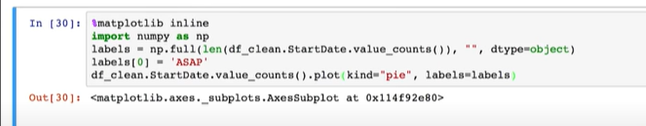